<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Identificación de objetos (GPU)

In [1]:
import sys
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/opencv/imagenes/"
    sys.path.append(data_dir)
    !pip -q install ultralytics
else:
    import os
    # data_dir = os.getcwd() + "/imagenes/"
    data_dir ="data/"

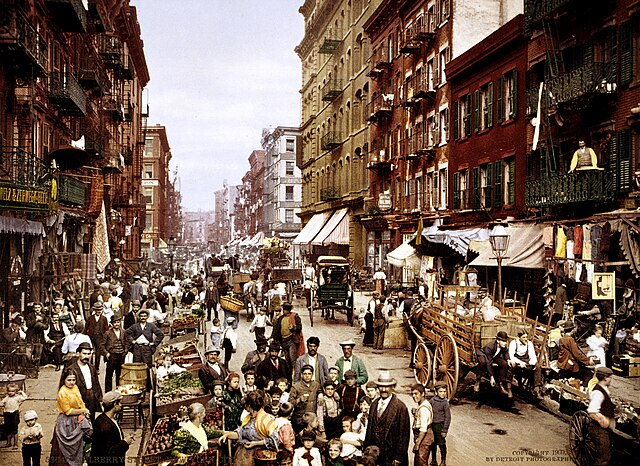


image 1/1 /home/roberto/GitClones/eia/moia/vision/data/image.jpg: 480x640 12 persons, 1057.0ms
Speed: 2.1ms preprocess, 1057.0ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)
Coordenadas: tensor([[364.0872, 370.9476, 410.5723, 465.7780]])
ID de clase: tensor([0.])
Score: tensor([0.5986])

Coordenadas: tensor([[409.2825, 383.1328, 433.8698, 466.0000]])
ID de clase: tensor([0.])
Score: tensor([0.5817])

Coordenadas: tensor([[427.5295, 381.1416, 451.6563, 465.9686]])
ID de clase: tensor([0.])
Score: tensor([0.5161])

Coordenadas: tensor([[293.0505, 336.0190, 329.4248, 386.5291]])
ID de clase: tensor([0.])
Score: tensor([0.4685])

Coordenadas: tensor([[ 17.2176, 409.7812,  43.2844, 465.9221]])
ID de clase: tensor([0.])
Score: tensor([0.4599])

Coordenadas: tensor([[ 48.1452, 371.2222,  92.5168, 466.0000]])
ID de clase: tensor([0.])
Score: tensor([0.4239])

Coordenadas: tensor([[ 89.9402, 390.4515, 132.3834, 464.6889]])
ID de clase: tensor([0.])
Score: tensor([0.3820])



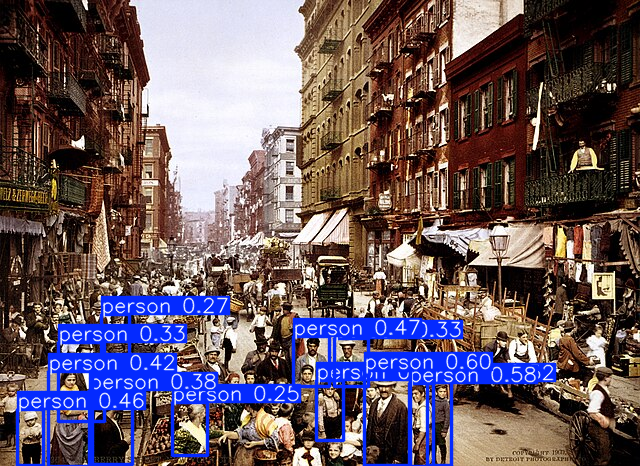

In [3]:
# prompt: dada una imagen referenciada mediabte una url, descargala, muestrala y, empleando yolo v8, muestra las identificaciones que ha hecho (localización, id y core) para finalmente mostrar la imagen con las identificaciones rotuladas.

import PIL
from IPython.display import Image, display
from ultralytics import YOLO
'''
# URL de la imagen
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/NYC_Mulberry_Street_3g04637u.jpg/640px-NYC_Mulberry_Street_3g04637u.jpg"
#image_url = "https://raw.github.com/FranPuentes/iTI2025/main/data/traffic.jpg"

# Descargar la imagen
!wget -q {image_url} -O data/image.jpg
'''
# Mostrar la imagen descargada
# image = Image(filename='data/image.jpg')
# display(image)

# Cargar el modelo YOLOv8
model = YOLO('yolov8x.pt')

# Realizar la detección de objetos pero no puedo usar el objeto IPython.display.Image
# Sin embargo el objeto PIL.Image si me sirve y también un path directamente.
results = model('data/image.jpg')

# Mostrar las detecciones (localización, ID y score)
for r in results:
  for box in r.boxes:
    print(f"Coordenadas: {box.xyxy}")
    print(f"ID de clase: {box.cls}")
    print(f"Score: {box.conf}\n")

# Mostrar la imagen con las etiquetas
# NOTA: esta parte fue añadida a mano, el original intercambiaba los canales Red y Blue.
image=PIL.Image.fromarray(results[0].plot())
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
image



image 1/1 /home/roberto/GitClones/eia/moia/vision/data/cropped_image.jpg: 256x640 12 persons, 548.6ms
Speed: 1.1ms preprocess, 548.6ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 640)
Coordenadas: tensor([[362.7546, 138.5987, 410.4313, 232.8205]])
ID de clase: tensor([0.])
Score: tensor([0.6566])

Coordenadas: tensor([[409.3051, 150.2953, 434.1228, 232.8103]])
ID de clase: tensor([0.])
Score: tensor([0.5731])

Coordenadas: tensor([[586.8230, 131.9948, 616.2300, 231.7139]])
ID de clase: tensor([0.])
Score: tensor([0.4998])

Coordenadas: tensor([[ 47.9995, 154.1860,  92.6455, 232.8652]])
ID de clase: tensor([0.])
Score: tensor([0.4865])

Coordenadas: tensor([[428.0404, 149.3771, 451.6206, 232.7271]])
ID de clase: tensor([0.])
Score: tensor([0.4635])

Coordenadas: tensor([[ 88.0695, 157.0499, 130.9942, 232.3851]])
ID de clase: tensor([0.])
Score: tensor([0.4088])

Coordenadas: tensor([[ 18.9102, 176.0732,  43.5479, 232.7700]])
ID de clase: tensor([0.])
Score: tensor([0.39

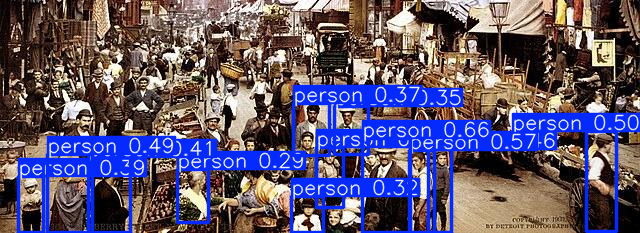

In [5]:
# prompt: En la imagen anterior (en el fichero image.jpg), hacer un zoom en la mitad inferior y volver a hacer la predicción, 
# mostrando los resultados y la imagen con las identificaciones.

# Recortar la imagen (mitad inferior)
image = PIL.Image.open('data/image.jpg')
width, height = image.size
cropped_image = image.crop((0, height // 2, width, height))
# cropped_image.save('data/cropped_image.jpg')

# Mostrar la imagen recortada
# display(cropped_image)

# Realizar la detección de objetos en la imagen recortada
results = model('data/cropped_image.jpg')

# Mostrar las detecciones (localización, ID y score)
for r in results:
  for box in r.boxes:
    print(f"Coordenadas: {box.xyxy}")
    print(f"ID de clase: {box.cls}")
    print(f"Score: {box.conf}\n")

# Mostrar la imagen recortada con las etiquetas
image=PIL.Image.fromarray(results[0].plot())
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
image


In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
results = model([data_dir + 'coches_aparcados.jpg'])


0: 480x640 9 persons, 4 cars, 962.6ms
Speed: 15.3ms preprocess, 962.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


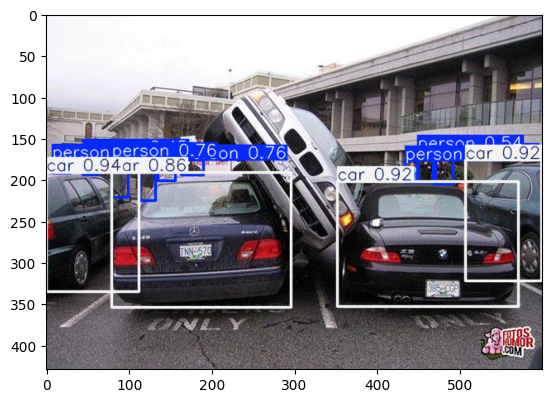

In [6]:
r = results[0]
im_bgr = r.plot()
img = cv.cvtColor(im_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
print("Boxes")
print(r.boxes)  # print the Boxes object containing the detection bounding boxes
print("Keypoints")
print(r.keypoints)  # print the Keypoints object containing the detected keypoints
print("Masks")
print(r.masks)  # print the Masks object containing the detected instance masks
print("Probs")
print(r.probs)  # print the Probs object containing the detected class probabilities
print("Obb")
print(r.obb)  # print the OBB object containing the oriented detection bounding boxes
print("Names")
print(r.names)

Boxes
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
conf: tensor([0.9387, 0.9214, 0.9174, 0.8608, 0.7633, 0.7605, 0.7186, 0.6827, 0.6325, 0.5363, 0.4857, 0.4484, 0.3523])
data: tensor([[2.6708e-01, 1.9128e+02, 1.1284e+02, 3.3571e+02, 9.3867e-01, 2.0000e+00],
        [5.0736e+02, 1.7617e+02, 5.9976e+02, 3.2282e+02, 9.2135e-01, 2.0000e+00],
        [3.5221e+02, 2.0231e+02, 5.7129e+02, 3.5360e+02, 9.1740e-01, 2.0000e+00],
        [7.9459e+01, 1.9139e+02, 2.9606e+02, 3.5412e+02, 8.6078e-01, 2.0000e+00],
        [7.9888e+01, 1.7392e+02, 9.9799e+01, 2.2179e+02, 7.6332e-01, 0.0000e+00],
        [1.6312e+02, 1.7643e+02, 1.9017e+02, 1.9444e+02, 7.6047e-01, 0.0000e+00],
        [7.4243e+00, 1.7536e+02, 3.0843e+01, 1.9213e+02, 7.1861e-01, 0.0000e+00],
        [4.3487e+02, 1.7735e+02, 4.5029e+02, 2.0320e+02, 6.8267e-01, 0.0000e+00],
        [1.3527e+02, 1.7612e+02, 1.5698e+02, 2.0159e+02, 6.3249e-01, 0.0000e+00],
       